In [19]:
from pathlib import Path 
import pandas as pd
import hvplot.pandas
import os 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_home = Path('/home/abanihirwe/.kaggle/competitions/tgs-salt-identification-challenge/')

In [3]:
ls -al --block-size=MB {dataset_home}

total 213MB
drwxrwxr-x 4 abanihirwe abanihirwe   1MB Aug  4 15:58 ./
drwxrwxr-x 5 abanihirwe abanihirwe   1MB Aug  4 15:29 ../
-rw-rw-r-- 1 abanihirwe abanihirwe   1MB Aug  4 15:29 depths.csv
-rw-rw-r-- 1 abanihirwe abanihirwe   1MB Aug  4 15:29 sample_submission.csv
drwxrwxr-x 3 abanihirwe abanihirwe   1MB Aug  4 15:58 test/
-rw-rw-r-- 1 abanihirwe abanihirwe 172MB Aug  4 15:30 test.zip
drwxrwxr-x 4 abanihirwe abanihirwe   1MB Aug  4 15:47 train/
-rw-rw-r-- 1 abanihirwe abanihirwe   1MB Aug  4 15:29 train.csv
-rw-rw-r-- 1 abanihirwe abanihirwe  40MB Aug  4 15:30 train.zip


In [4]:
train = pd.read_csv(dataset_home / 'train.csv')
train.head()

,id,rle_mask
0,575d24d81d,NaN
1,a266a2a9df,5051 5151
2,75efad62c1,9 93 109 94 210 94 310 95 411 95 511 96 612 96...
3,34e51dba6a,48 54 149 54 251 53 353 52 455 51 557 50 659 4...
4,4875705fb0,1111 1 1212 1 1313 1 1414 1 1514 2 1615 2 1716...


In [5]:
depths = pd.read_csv(dataset_home / 'depths.csv')
depths.head()

,id,z
0,4ac19fb269,306
1,1825fadf99,157
2,f59821d067,305
3,5b435fad9d,503
4,e340e7bfca,783


In [6]:
depths.hvplot.kde(y='z')

:Distribution   [z]   (Density)

In [7]:
import skimage.io 

In [8]:
sample = skimage.io.imread(dataset_home / 'train' / 'images' / '000e218f21.png')

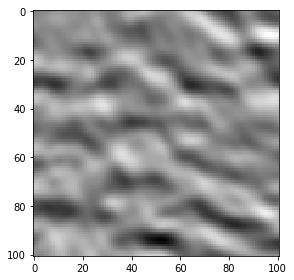

In [9]:
skimage.io.imshow(sample)

In [16]:
images = os.listdir(dataset_home / 'train'/ 'images')
im_samples = [os.path.join(dataset_home / 'train'/ 'images'/ f) for f in images[:10]]
im_samples

['/home/abanihirwe/.kaggle/competitions/tgs-salt-identification-challenge/train/images/f5c25276d2.png',
 '/home/abanihirwe/.kaggle/competitions/tgs-salt-identification-challenge/train/images/a8e4e6ddec.png',
 '/home/abanihirwe/.kaggle/competitions/tgs-salt-identification-challenge/train/images/1739b1634d.png',
 '/home/abanihirwe/.kaggle/competitions/tgs-salt-identification-challenge/train/images/17c5d2464c.png',
 '/home/abanihirwe/.kaggle/competitions/tgs-salt-identification-challenge/train/images/38438eab6c.png',
 '/home/abanihirwe/.kaggle/competitions/tgs-salt-identification-challenge/train/images/7ebd3f0cdd.png',
 '/home/abanihirwe/.kaggle/competitions/tgs-salt-identification-challenge/train/images/29a1b18e79.png',
 '/home/abanihirwe/.kaggle/competitions/tgs-salt-identification-challenge/train/images/935cba59ad.png',
 '/home/abanihirwe/.kaggle/competitions/tgs-salt-identification-challenge/train/images/aede306d15.png',
 '/home/abanihirwe/.kaggle/competitions/tgs-salt-identification-

In [17]:
samples = [skimage.io.imread(file_name) for file_name in im_samples]

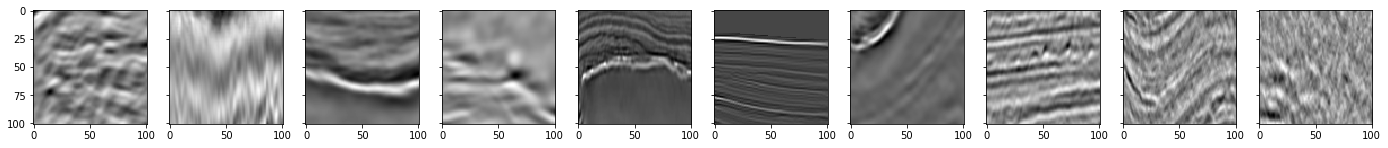

In [30]:
fig, axarr = plt.subplots(1, 10, sharex=True, sharey=True, figsize=(24, 2.5))
for i, sample in enumerate(samples):
    axarr[i].imshow(sample, cmap='gray')

## Create a Distributed Array 


In [21]:
import dask.array as da 
from dask import delayed

In [22]:
imread = delayed(skimage.io.imread, pure=True)  # Lazy version of imread

In [24]:
images_paths = [os.path.join(dataset_home / 'train'/ 'images'/ f) for f in images]

In [25]:
lazy_values = [imread(image) for image in images_paths]  # Lazily evaluate imread on each image 

In [26]:
# Construct a small Dask array for every lazy value
arrays = [da.from_delayed(lazy_value, 
                          dtype=sample.dtype, 
                          shape=sample.shape)
         for lazy_value in lazy_values]

In [27]:
stack = da.stack(arrays, axis=0)  # Stack all small Dask Arrays into one

In [28]:
stack

dask.array<stack, shape=(4000, 101, 101, 3), dtype=uint8, chunksize=(1, 101, 101, 3)>

In [31]:
stack = stack.rechunk(chunks=(20, 101, 101, 3))  # Combine chunks to reduce overhead
stack

dask.array<rechunk-merge, shape=(4000, 101, 101, 3), dtype=uint8, chunksize=(20, 101, 101, 3)>

In [32]:
stack[2000, :, :, :].compute()

array([[[209, 209, 209],
        [202, 202, 202],
        [192, 192, 192],
        ...,
        [184, 184, 184],
        [188, 188, 188],
        [188, 188, 188]],

       [[219, 219, 219],
        [215, 215, 215],
        [207, 207, 207],
        ...,
        [195, 195, 195],
        [198, 198, 198],
        [197, 197, 197]],

       [[221, 221, 221],
        [219, 219, 219],
        [214, 214, 214],
        ...,
        [202, 202, 202],
        [203, 203, 203],
        [200, 200, 200]],

       ...,

       [[255, 255, 255],
        [250, 250, 250],
        [244, 244, 244],
        ...,
        [112, 112, 112],
        [115, 115, 115],
        [108, 108, 108]],

       [[251, 251, 251],
        [248, 248, 248],
        [243, 243, 243],
        ...,
        [120, 120, 120],
        [122, 122, 122],
        [116, 116, 116]],

       [[235, 235, 235],
        [235, 235, 235],
        [231, 231, 231],
        ...,
        [127, 127, 127],
        [126, 126, 126],
        [121, 121, 121]]

In [33]:
from dask.distributed import Client, progress 

In [37]:
client = Client()

In [38]:
client

Client Scheduler: tcp://127.0.0.1:37691 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 12.50 GB


In [39]:
stack = client.persist(stack)

/home/abanihirwe/opt/miniconda3/envs/ds/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


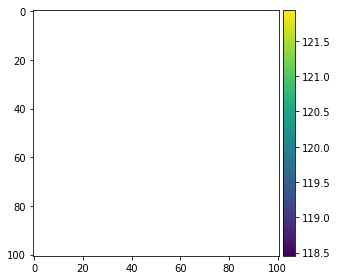

In [44]:
skimage.io.imshow(stack.mean(axis=0).compute())

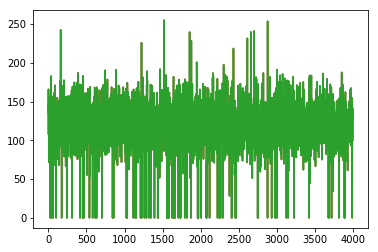

In [45]:
plt.plot(stack.mean(axis=[1, 2]).compute())

In [47]:
rechunked = stack.rechunk(chunks=(4000, 10, 10, 3))
rechunked

dask.array<rechunk-merge, shape=(4000, 101, 101, 3), dtype=uint8, chunksize=(4000, 10, 10, 3)>

In [48]:
x = da.fft.fft(rechunked, axis=0)

In [49]:
power = abs(x ** 2).astype('float32')

In [50]:
power = client.persist(power, optimize_graph=False)

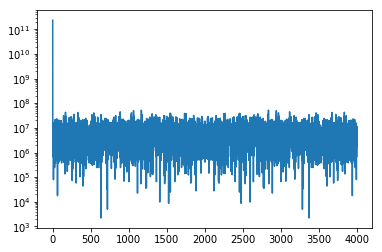

In [51]:
plt.semilogy( 1 + power[:, 0, 0, 0].compute())

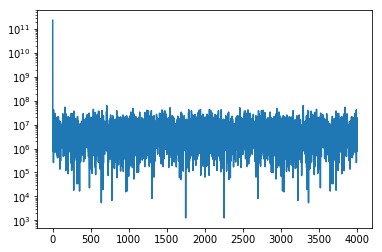

In [53]:
plt.semilogy( 1 + power[:, 100, 100, 0].compute())